## Step0: E-Commerce 데이터와 군집분석의 활용

### E-Commerce & Platform Business에서의 판매자(공급)

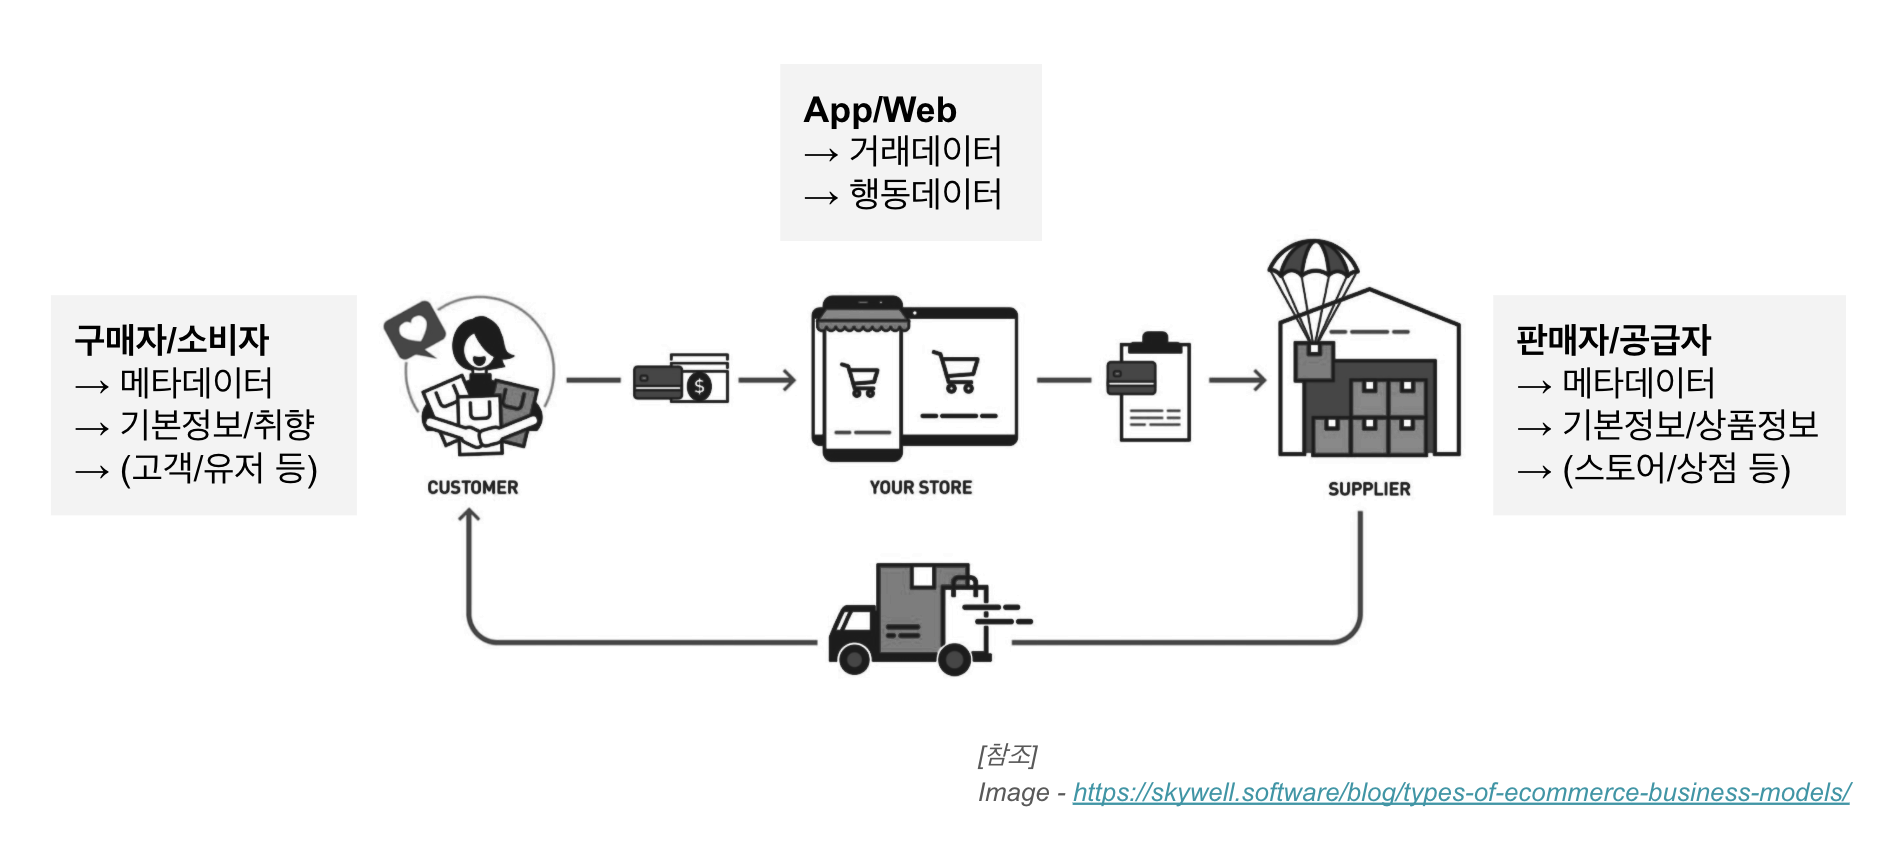

### Platform Business 판매자(공급) 데이터에 사용되는 용어

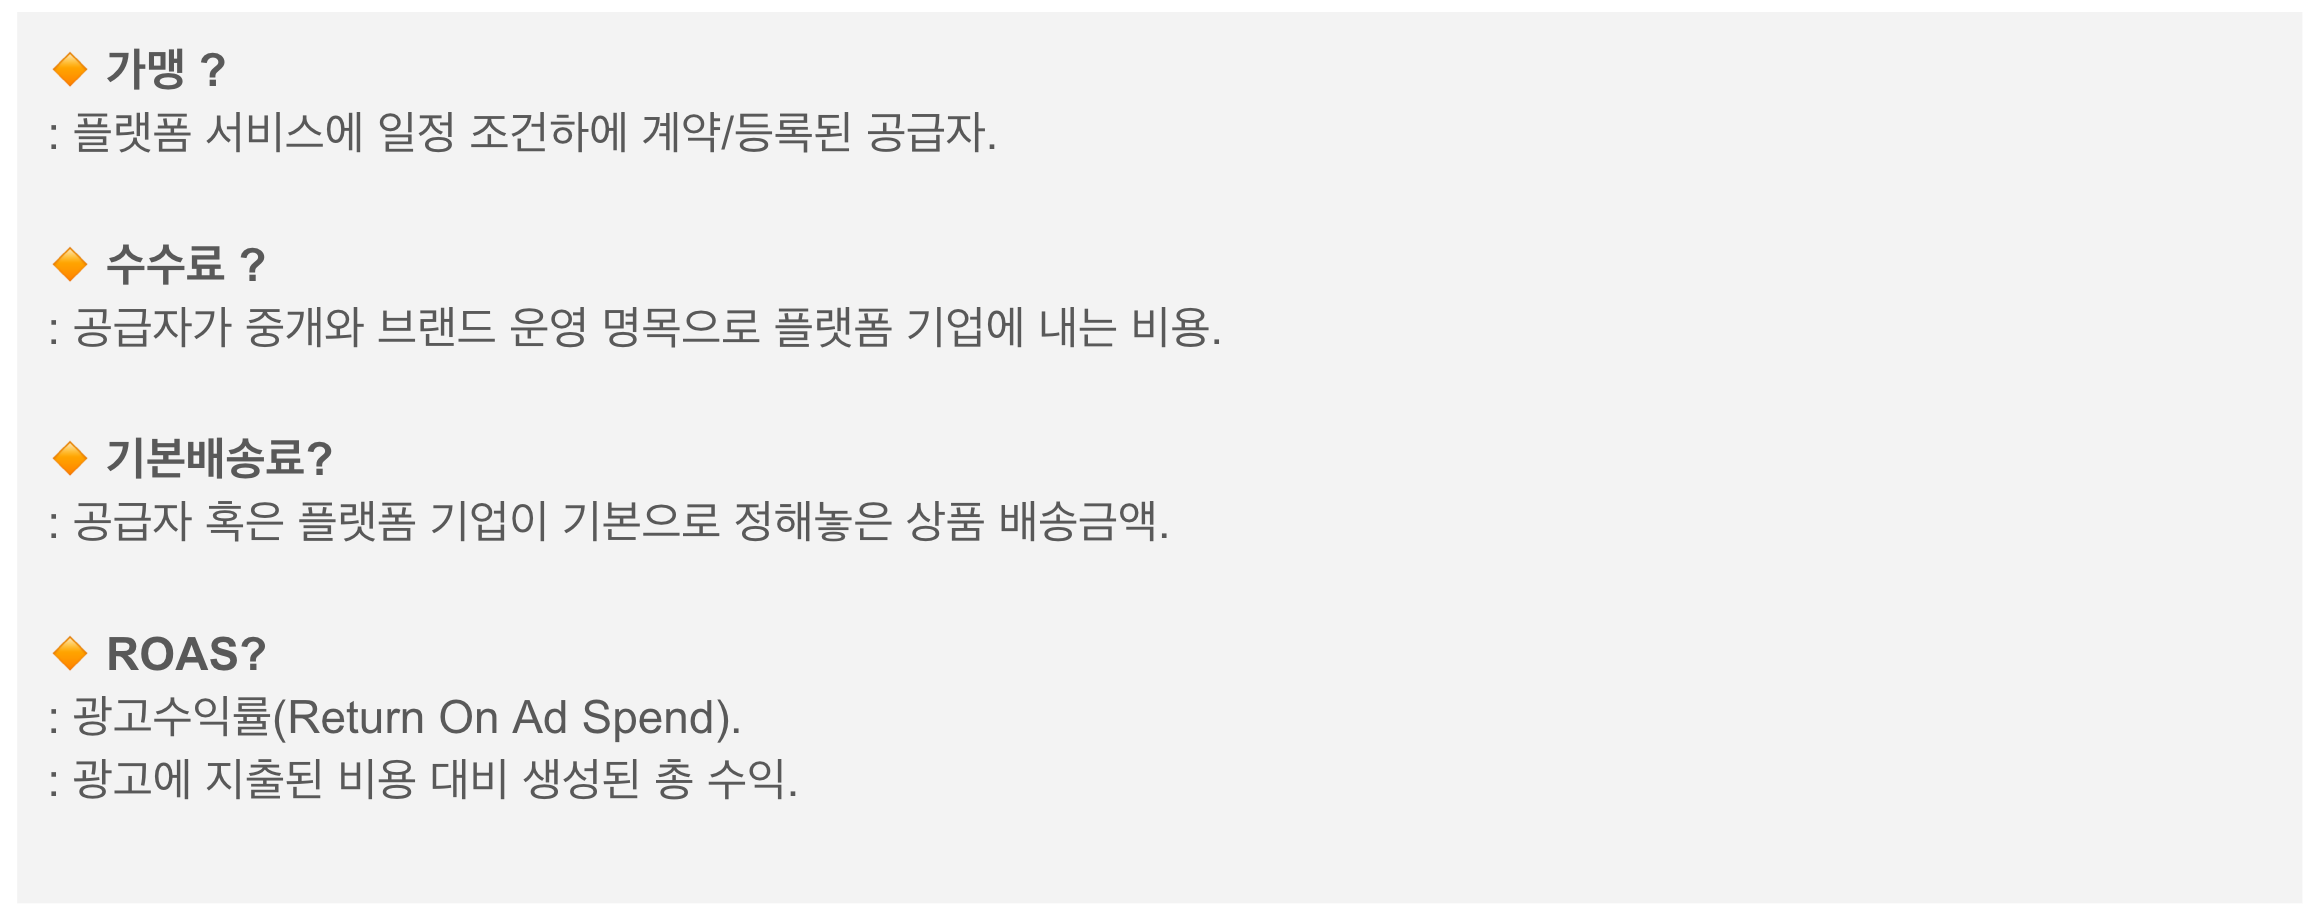

## Step1: E-Commerce 판매자(공급) 데이터 불러오기 & 전처리


### 문제 1. E-Commerce 데이터 불러오기 (stores, orders)
: 주어진 url을 사용해서 E-Commerce 데이터를 다운로드 받아보세요.

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore') 
pd.set_option('display.max_columns', None)


In [ ]:
# 데이터 url.
vendor_metadata_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/vendor_meta_data.csv"
vendor_statsdata_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/vendor_stats_data.csv"

# 위의 url를 사용해서 각각의 DataFrame을 생성해보세요.
vendor_metadata_df = 
vendor_stats_df = 


In [ ]:
# load된 데이터의 형태(shape)을 확인해보세요.


### 문제 2. E-Commerce 판매자 메타데이터 둘러보기 (metadata)
: 데이터별 컬럼 명세서를 통해 E-Commerce 판매자 메타 데이터를 파악해보세요.

#### [Vendor metadata 컬럼 명세서]  

컬럼명 | 설명
--- | ---
vendor_id | 판매자 고유 ID
if_affiliation | 가맹가능여부 (True:미계약상태, False:계약완료상태) 
joined_date | 등록일자 (yyyy-mm-dd) 
bookmark_cnt | 즐겨찾기 등록 수
item_cnt | 등록한 아이템/상품 수
base_shipping_fee | 기본 배송료(원)
commission_rate | 수수료율(%) 




In [ ]:
# 컬럼의 데이터 타입을 확인해보세요.


### 문제 3. E-Commerce 판매자 메타데이터 전처리하기 (metadata)
: E-Commerce 판매자 메타 데이터를 분석에 필요한 컬럼을 생성해보세요.

In [ ]:
# 등록일자(joined_date)를 사용해서 2021년 1월 1일 기준 판매자의 등록기간을 생성해보세요.
today_ymd = datetime(2021,1,1)

# 가입일자의 포멧을 날짜형식('datetime64[ns]')으로 변경해보세요.

# 가입기간을 일(day)로 계산해보세요.

# 가입기간을 년도(year)로 계산해보세요. 
# [참고] np.timedelta64(1, "Y") 를 사용해보세요.



In [ ]:
# 가맹가능여부(if_affiliation)를 수치화 시켜보세요.



### 문제 4. E-Commerce 판매자 거래데이터 둘러보기 (transaction data)
: 데이터별 컬럼 명세서를 통해 E-Commerce 판매자 거래 데이터를 파악해보세요.

#### [Vendor stat 컬럼 명세서]  

컬럼명 | 설명
--- | ---
vendor_id | 판매자 고유 ID
weekly_order_cnt | 주평균 거래건수
monthly_order_cnt | 월평균 거래건수
total_order_cnt | 총 주문수
total_user_cnt | 총 주문고객수  
avg_cost | 평균 거래금액  
avg_delivery_cost | 평균 배송금액  
roas_growth_rate | ROAS(%)
review_score | 리뷰 점수
review_rate | 리뷰작성 비율(%)
review_reply_rate | 리뷰응대 비율(%)


			

In [ ]:
# 컬럼의 데이터 타입을 확인해보세요.


In [ ]:
# 컬럼별 분위수, 최소, 최대값등을 확인해보세요.


## Step2: Clustering - 판매자(공급) 메타데이터를 이용한 군집화



### 문제 5. EDA : 판매자(메타데이터) - 1차원에서 살펴보기


In [ ]:
# 컬럼별 null값 살펴보세요.


In [ ]:
# vendor_id 기준으로 unique 해야합니다. vendor_id 기준으로 중복 데이터를 확인해보세요.


In [ ]:
# 가맹여부별(if_affiliation) 판매자 분포를 파악해보세요.


In [ ]:
# 등록기간(years_from_joined)에 따른 고객 분포를 확인해보세요.

vendor_cnt_from_joined_df = 
fig = px.bar(vendor_cnt_from_joined_df, x="", y="")
fig.update_layout(height=500, width=1000)
fig.show()

In [ ]:
# 등록한 아이템/상품수(item_cnt)에 분포를 Bar plot으로 확인해보세요.
vendor_item_cnt_df = 
fig = px.bar(vendor_item_cnt_df, x="", y="")
fig.update_layout(height=500, width=1000)
fig.show()

In [ ]:
# 등록한 아이템/상품수(item_cnt)에 분포를 Box plot으로 확인해보세요.
fig = px.box(, y="", points="")
fig.show()

In [ ]:
# 수수료율(commission_rate)의 분포를 Bar plot으로 확인해보세요.
vendor_comm_rate_df = 
fig = px.bar(vendor_comm_rate_df, x="", y="")
fig.update_layout(height=500, width=1000)
fig.show()

### 문제 6. EDA : 판매자(메타데이터) - 2차원에서 살펴보기

In [ ]:
# 변수간 상관계수를 살펴보세요.


In [ ]:
# 유효한 정보만 확인하는 방법입니다.
# [참고] 상관계수중에 상대적/비교적으로 높은 관계를 찾아보세요.


In [ ]:
# base_shipping_fee & commission_rate 관계를 나타내는 scatter plot을 그려보세요.
fig = px.scatter(x=, y=)
fig.update_layout(width=600, height=500)
fig.show()

In [ ]:
# 가맹여부(if_affiliation)에 따른 변수별 평균값에 차이가 있는지 확인해보세요 (groupby() 사용.)


### 문제 7. Clustering : 판매자(메타데이터) - 메타데이터 훈련을 위한 정제


In [ ]:
# 판매자 메타데이터에서 군집분석을 위한 변수만 남겨보세요.
# [참고] 아래 리스트(numerics_types)를 사용하여 숫자 형태의 변수만 남겨보세요.
numerics_types = ["int16", "int32", "int64", "float16", "float32", "float64"]
vendor_numerics_df = 
vendor_numerics_df.head(2)

In [ ]:
# 군집화에서 binary변수와 일반 숫자변수를 혼용해서 훈련시키는 것을 지양합니다.
# binary변수를 제거하세요.
# [참고] np.isin()을 활용해보세요.
user_numerics_cols = 
vendor_numerics_df = 
vendor_numerics_df.head(2)

In [ ]:
# 남겨진 변수의 평균, 분산등의 정보를 확인해보세요.
# [참고] min/max 값이 다른 변수들과 차이가 많이나는 변수를 기억해주세요.


### 문제 8. Clustering : 판매자(메타데이터) - 메타데이터 Normalization(정규화) 적용하기

In [ ]:
# Min-Max Normalization 모듈 import.
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# MinMaxScaler를 사용하여 고객 메타데이터의 값들을 0, 5사이의 값으로 정규화 시켜보세요.
mm_scaler = MinMaxScaler()
scaled_vendor_metadata = 
scaled_vendor_metadata_df = 
scaled_vendor_metadata_df.head()

In [ ]:
# 정규화시킨 데이터를 train/test set으로 9:1의 비율로 나눠보세요. (train_test_split)
train_df, test_df = 


### 문제 9. Clustering : 판매자(메타데이터) - 정규화된 메타데이터로 최적의 k 찾기 (Elbow method)

In [ ]:
# K-Means 모듈을 import 합니다.
from sklearn.cluster import KMeans

In [ ]:
# elbow method를 사용하여 최적의 k를 찾아봅시다.



In [ ]:
# elbow method를 그래프로 확인해보세요.
# x축이 k의 수, y축이 distortions인 line plot을 그려봅시다.
fig = px.line(x=, y=, labels={"x":"k", "y":"distortions"})
fig.update_layout(width=800, height=500)
fig.show()

### 문제 10. Clustering : 판매자(메타데이터) - 메타데이터로 K-Means 훈련시키기

### 문제 11. Clustering : 판매자(메타데이터) - 훈련된 K-Means 결과 확인/해석하기

In [ ]:
# 각 군집의 변수별 중심값을 비교해보세요.
# [참고] 변수별 중심값은 km.cluster_centers_ 를 활용하세요.


In [ ]:
# 각 군집별 데이터 수도 확인해보세요.
# [참고] K-means는 outlier를 잡지 않기 때문에 (=모든 데이터를 cluster화 시키기 때문에) 각 군집마다 포함된 데이터양을 비교해보면 좋습니다.
label_list = 


### 문제 12. Clustering : 판매자(메타데이터) - k를 변경해서 K-Means를 훈련결과 비교하기

In [ ]:
# k를 2-5 혹은 다른 값으로 변경해서 군집의 중심값을 비교해보세요.


### 문제 13. Clustering : 판매자(메타데이터) - 정규화된 메타데이터로 최적의 k 찾기 (Silhouette method)

In [ ]:
# SilhouetteVisualizer 사용해서 훈련(training)과 그래프를 한번에 해결해보세요.
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
# k의 범위를 지정해주세요.
# [주의!] 최소 2개이상의 label/cluster가 있어야 합니다.
k_range = 
for i in k_range:
    

### 문제 14. Clustering : 판매자(메타데이터) - 최적의 k를 정하여 최종으로 K-Means 훈련시키기

In [ ]:
# k를 2-5 혹은 다른 값으로 변경해서 군집의 중심값을 비교해보세요.
km_model = 


### 문제 15. Clustering : 판매자(메타데이터) - 메타데이터로 Agglomerative 훈련시키기  
: 동일한 데이터로 Agglomerative 알고리즘을 훈련시켜봅니다.


In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Agglomerative의 파라미터 설정 시, linkage="ward", affinity="euclidean"로 설정해 보세요.
# n_clusters는 kmeans의 최적의 k를 참고하여 자유롭게 설정해보세요.


In [ ]:
# 훈련된 label을 변수에 저장하세요.
aggl_labels = 

# K-Means와 Agglomerative 알고리즘 결과에 차이가 있는지 시각화로 비교해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=("K-Means cluster","Agglomerative cluster"))

fig.add_trace(
    go.Scatter(x=, 
               y=, 
               mode="markers",
               marker=dict(color=),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=, 
               y=, 
               mode="markers",
               marker=dict(color=),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800, showlegend=False)
fig.show()

### 문제 16. Clustering : 판매자(메타데이터) - 훈련된 모델에 test set을 사용해 predict 하기

In [ ]:
# [문제 14]의 모델을 그대로 사용하여 prediction을 해보세요.
test_vendor_metadata_label_df = test_df.copy()
test_cluster = 


In [ ]:
# [문제 15]의 모델을 그대로 사용하여 prediction을 해보세요.
test_cluster = 


In [ ]:
# [문제 15]과 동일하게 그래프로 prediction결과를 비교해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=("K-means cluster-test", "Agglomerative cluster-test"))

fig.add_trace(
    go.Scatter(x=, 
               y=, 
               mode="markers",
               marker=dict(color=),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=, 
               y=, 
               mode="markers",
               marker=dict(color=),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

## Step3: Clustering - 판매자(공급) 컨설팅에 활용할 그룹으로 군집화 (거래데이터 활용)
: Step3에서는 판매자 거래데이터를 함께 사용합니다.   
: PCA를 통해 차원을 축소하고, HDBSCAN 모델을 훈련시키고 최적의 파라미터를 찾는 방법을 반복하여, 가장 적합한 모델로 훈련시킵니다.

### 문제 17. EDA : 판매자(거래데이터) - 변수간 상관관계 살펴보기

In [ ]:
# 판매자 거래데이터를 살펴보세요. (vendor_stats_df)


In [ ]:
# 상관계수중에 상대적/비교적으로 높은 관계를 찾아보세요.


In [ ]:
# 상관관계를 기반으로 변수를 선택해서 Scatter plot을 그려보세요.
# ["monthly_order_cnt", "avg_delivery_cost", "roas_growth_rate", "review_score", "review_reply_rate"]
sns.pairplot()
plt.title("판매자 거래데이터 변수 상관관계", fontsize = 20)
plt.show()

### 문제 18. Clustering : 판매자(거래데이터) - HDBSCAN 모델 install & 정규화 적용하기
: HDBSCAN 모듈을 설치하고 판매자 거래데이터를 train&test set 으로 분리하세요.

In [ ]:
!pip install hdbscan

In [ ]:
# 거래 데이터의 컬럼과 모델 훈련에 필요한 컬럼을 선택해보세요.
# [참고] 수치화되지 않은 컬럼을 제외하세요.


In [ ]:
# 선택한 컬럼으로 데이터셋을 나눠주세요.
vendor_numerics_df = 

In [ ]:
mm_scaler = MinMaxScaler()
scaled_vendor_stats = 
scaled_vendor_stats_df = 
scaled_vendor_stats_df.head()

### 문제 19. Clustering : 판매자(거래데이터) - 데이터셋 분리하기
: 판매자 거래데이터를 train&test set 으로 분리하세요.

In [ ]:
# 정규화시킨 데이터를 train/test set으로 9:1의 비율로 나눠보세요. (train_test_split)



In [ ]:
# 결과 라벨을 저장하기 위한 dataframe을 생성합니다.


### 문제 20. Clustering : 판매자(거래데이터) - HDBSCAN 모델 파라미터 탐색하기
: 판매자 거래데이터의 clustering을 위해 HDBSCAN 모듈을 훈련시키고 파라미터를 탐색해보세요.

In [ ]:
# hdbscan 모듈을 import 합니다.
import hdbscan

In [ ]:
# min_samples 파라미터를 비교하는 함수를 사용해보세요.
# [참고] min_cluster_size=30, label_name="hdbscan_label", x_col="total_order_cnt" , y_col="avg_delivery_cost" 로 설정해주세요. 

def opt_hdbscan(train_x, ms_list, data_df, min_cluster_size=30, label_name="hdbscan_label", x_col="total_order_cnt" , y_col="avg_delivery_cost"):
  for ms in ms_list: 
    hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=ms, prediction_data=True).fit_predict(train_x)
    data_df[label_name] = hdbscan_label
    data_df[label_name] = data_df[label_name].astype(str)

    # outlier 추세확인. (outlier=클러스터명이 -1인 경우)
    hdbscan_case_dict = dict((x,list(hdbscan_label).count(x)) for x in set(hdbscan_label))
    outliers = hdbscan_case_dict[-1]

    # 시각화하기.
    fig = px.scatter(data_df, x=x_col, y=y_col, color=label_name)
    fig.update_layout(width=600, height=500, title=f"min_samples={ms} > label수: {len(set(hdbscan_label))}, outlier: {outliers}")
    fig.show()

    # 군집별 데이터 분포 확인.
    hdb_cluster_df = data_df.groupby(label_name).mean()
    hdb_cluster_df["point_cnt"] = data_df[label_name].value_counts()
    print(hdb_cluster_df)
  return data_df

In [ ]:
# 만든 함수로 파라미터를 비교해보세요. (min_cluster_size=5)
hdb_data_df = opt_hdbscan()


### 문제 21. Clustering : 판매자 - 메타데이터와 거래데이터 합치기
: 판매자 메타데이터와 거래데이터를 합쳐서 군집화 모델을 훈련시켜보세요.

In [ ]:
# Step2에서 사용한 판매자 메타데이터에 거래데이터를 join시켜보세요. 
# [참고] set_index()를 사용해 index를 기준으로 join해보세요.
vendor_df = 


In [ ]:
# join된 데이터를 확인해보세요.


In [ ]:
# 판매자 데이터에서 군집분석을 위한 숫자 형태의 변수만 남겨보세요.
numerics_types = ["int16", "int32", "int64", "float16", "float32", "float64"]


In [ ]:
# binary변수를 제거하세요.
# [참고] np.isin()을 활용해보세요.
vendor_numerics_cols = 


### 문제 22. EDA : 판매자 - 변수간 상관관계 살펴보기

In [ ]:
# 전체 변수간의 상관관계를 확인 해보세요.



In [ ]:
# 상관계수중에 상대적/비교적으로 높은 관계를 찾아보세요.


### 문제 23. Clustering : 판매자 - Normalization(정규화) 적용하기

In [ ]:
# 정규화에 사용되는 모듈 import.
from sklearn.preprocessing import StandardScaler

In [ ]:
# StandardScaler를 사용하여 [문제 21]에서 정제한 데이터를 정규화 시켜보세요.
scaled_vendor_trans = StandardScaler()
scaled_vendor_trans_df = 

### 문제 24. Clustering : 판매자 - PCA(Principal Components Analysis)를 통해 차원 축소하기
: PCA를 적용하여 변수의 차원을 축소 시켜보세요.

Principal Components Analysis (주성분 분석) : 

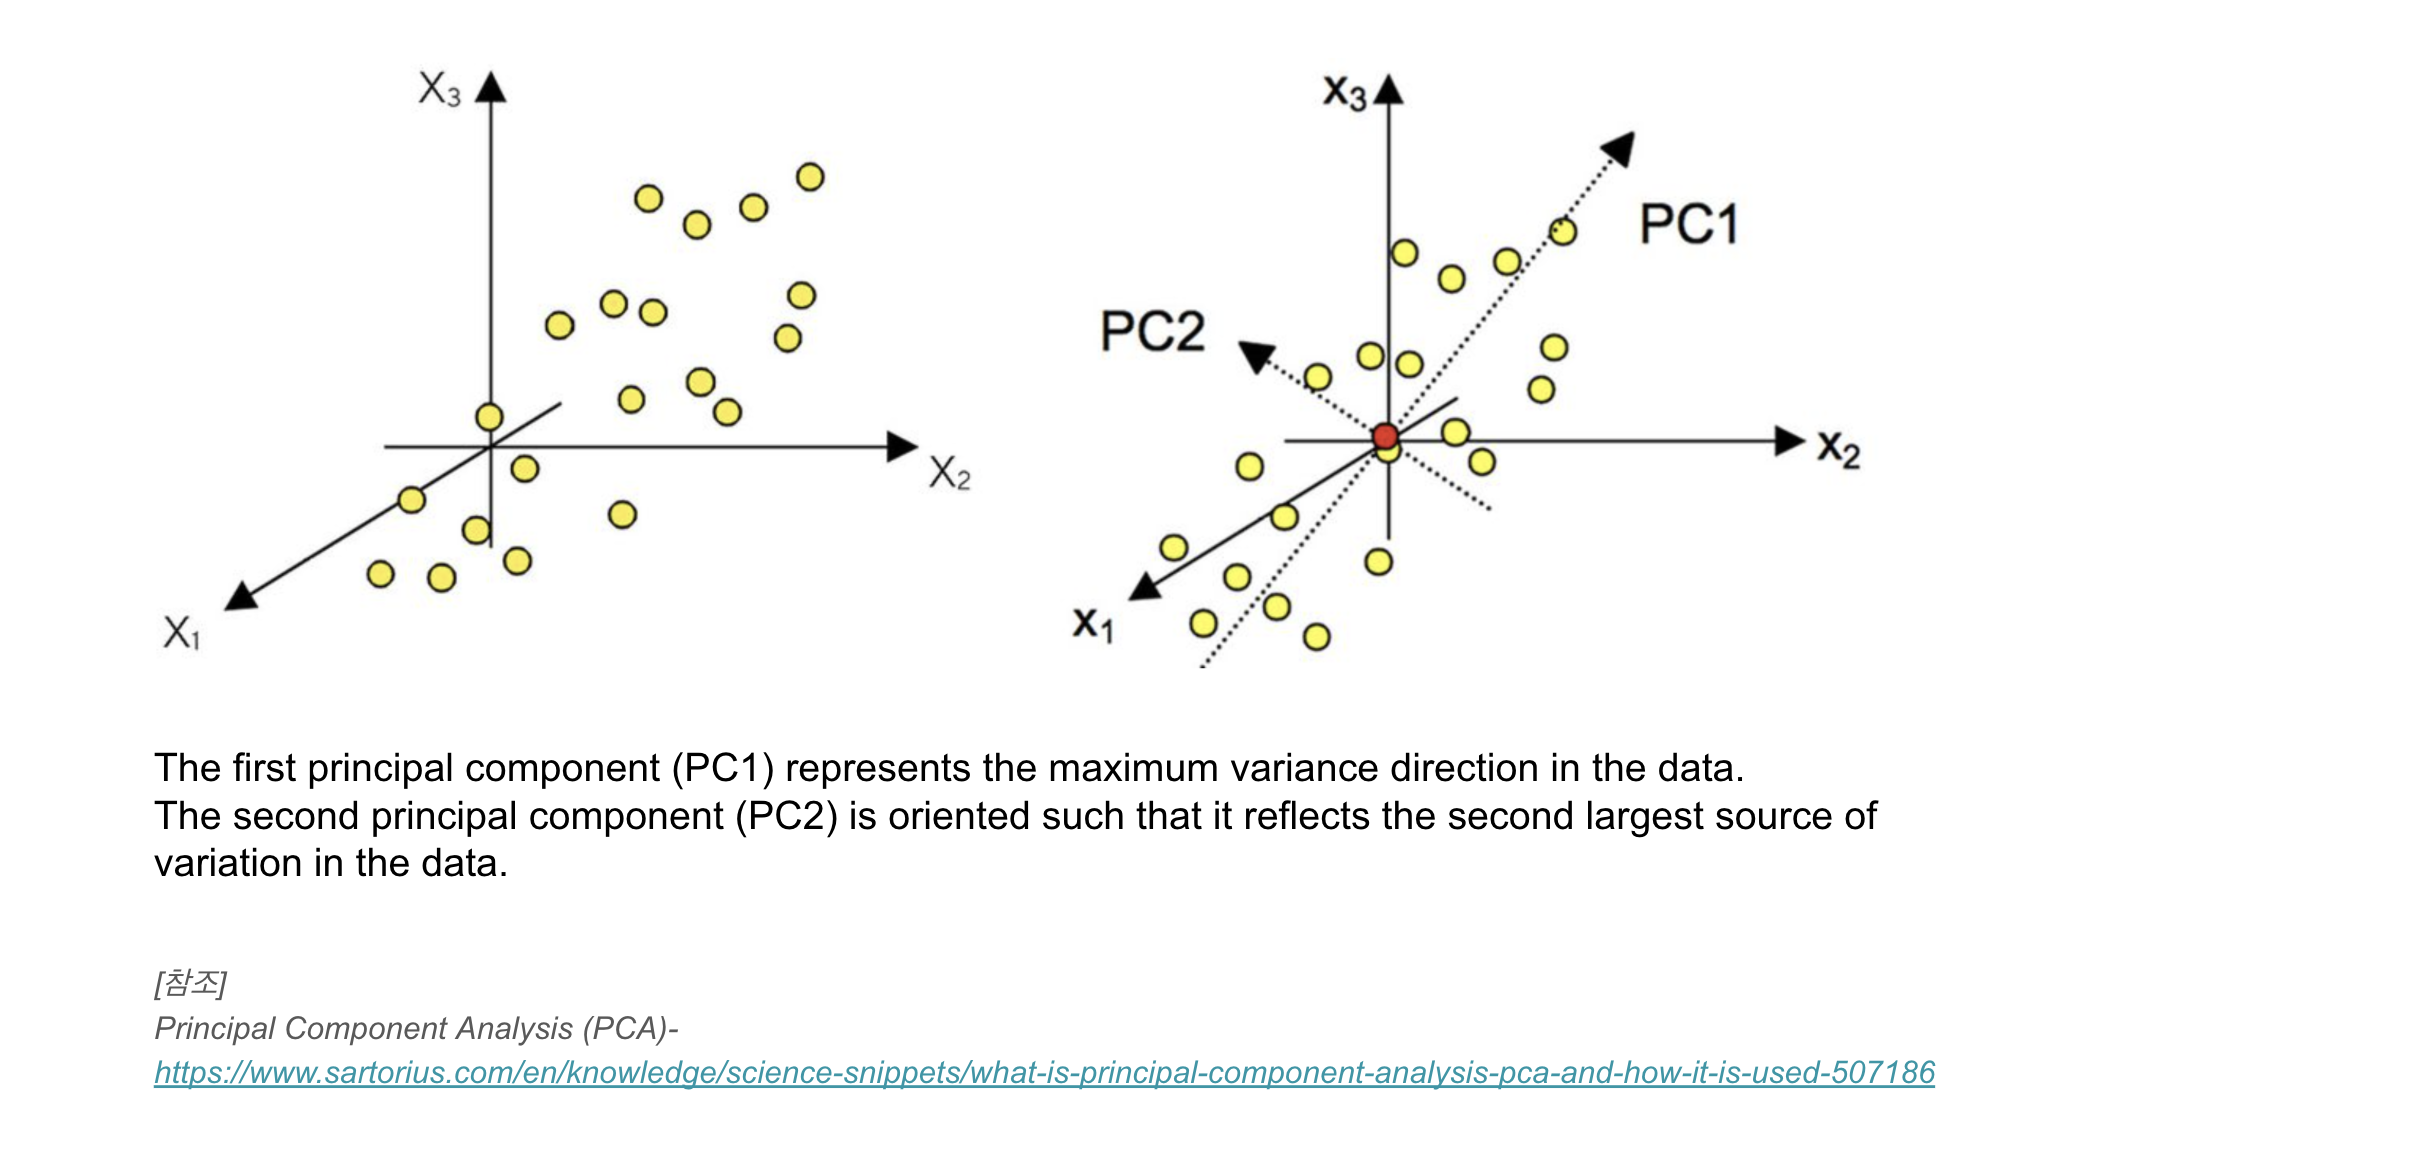


*PCA 모듈 상세보기 >> https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 


In [ ]:
# PCA를 위한 모듈 Import 하기.
from sklearn.decomposition import PCA


In [ ]:
# PCA모듈을 사용해서 [문제22]의 판매자 데이터를 훈련시켜보세요.
# [참고] 그래프를 그리기 위해서는 축소할 차원수를 지정하지 않습니다.



In [ ]:
# 그래프를 통해서 적당한 principal components 수를 찾아보세요.
fig = px.line(x=, 
              y=, 
              labels={"x":"principal components", "y":"explained variance"})
fig.update_layout(width=800, height=500)
fig.show()

In [ ]:
# 위 그래프를 통해 정한 principal components수로 데이터 차원을 축소해보세요.
pca = PCA()
vendor_pca_components = 


In [ ]:
# 차원이 축소된 데이터를 확인해보세요.


In [ ]:
# 주성분 변수명을 할당해주세요.



### 문제 25. Clustering : 판매자 - PCA를 통해 생성된 주성분 살펴보기

In [ ]:
# Heatmap 시각화를 통해 주성분과 기존의 변수간의 관계를 살펴보세요.
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=,
                   x=,
                   y=,
                   hoverongaps = False))
fig.update_layout(height=500, width=1000)
fig.show()

### 문제 26. Clustering : 판매자 - train/test set 분리하기

In [ ]:
# 차원축소된 데이터를 train/test set으로 9:1의 비율로 나눠보세요. (train_test_split)


### 문제 27. Clustering : 판매자 - 차원 축소된 데이터로 최적의 k 찾기

In [ ]:
!pip install kneed

In [ ]:
# 아래 parameter를 참고하여 kneed 모듈을 사용하여 자동으로 elbow값을 찾아보세요.
from kneed import KneeLocator
"""
[KneeLocator parameter 참고]
curve (str) – If ‘concave’, algorithm will detect knees. If ‘convex’, it will detect elbows.
direction (str) – one of {“increasing”, “decreasing”}
"""


print(f"최적의 k : {round(kneedle.elbow, 3)}")
print(f"최적의 k의 y값 : {round(kneedle.elbow_y, 3)}")

### 문제 28. Clustering : 판매자 - 최적의 k로 K-Means 훈련시키기

In [ ]:
# k를 2-5 혹은 다른 값으로 변경해서 군집의 중심값을 비교해보세요.
km = KMeans()


In [ ]:
# 각 군집별 데이터 수도 확인해보세요.
label_list = 


In [ ]:
# 훈련된 라벨을 저장해주세요.



In [ ]:
# 훈련결과를 시각화로 확인해보세요.
# [참고] PCA의 첫번째 주성분부터 사용하면 차이를 더 확실히 확인할 수 있습니다.
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means PCA cluster"))

fig.add_trace(
    go.Scatter(x=, 
               y=, 
               mode="markers",
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=, 
               y=, 
               mode="markers",
               marker=dict(color=),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
# 3D 그래프로 변수 3개를 시각화해보세요. 
fig = go.Figure(data=[go.Scatter3d(x=, 
                                   y=, 
                                   z=,
                                   mode='markers',
                                   marker=dict(
                                        size=5,
                                        color=,
                                        opacity=0.8
                                    )
                                   )])
fig.show()

### 문제 29. Clustering : 판매자 - 훈련된 모델에 test set을 사용해 predict 하기

In [ ]:
# [문제 14]의 모델을 그대로 사용하여 prediction을 해보세요.
test_vendor_label_df = 

In [ ]:
# 3D 그래프로 변수 3개를 시각화해보세요. 
fig = go.Figure(data=[go.Scatter3d(x=, 
                                   y=, 
                                   z=,
                                   mode='markers',
                                   marker=dict(
                                        size=5,
                                        color=,
                                        opacity=0.8
                                    )
                                   )])
fig.show()

## Step4: 활용사례 - 그룹화된 고객과 판매자를 활용하여 만든 추천시스템
: Chapter2에서 배운 고객 군집화와 Chapter3에서 배운 판매자 군집화를 활용한 간단한 추천 시스템을 만들어봅니다.

### Recommender System (추천시스템) 맛보기
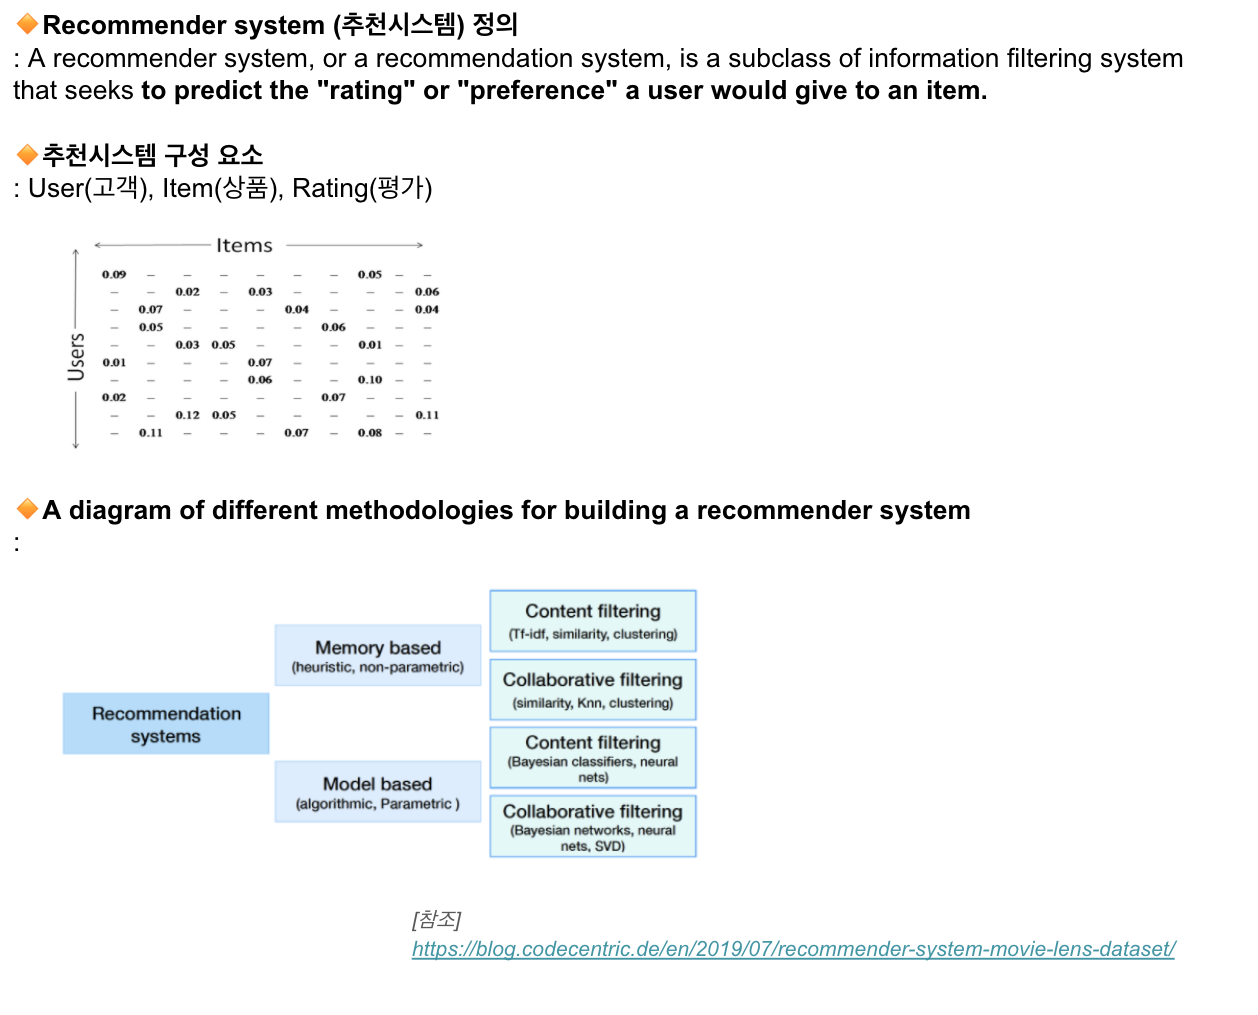

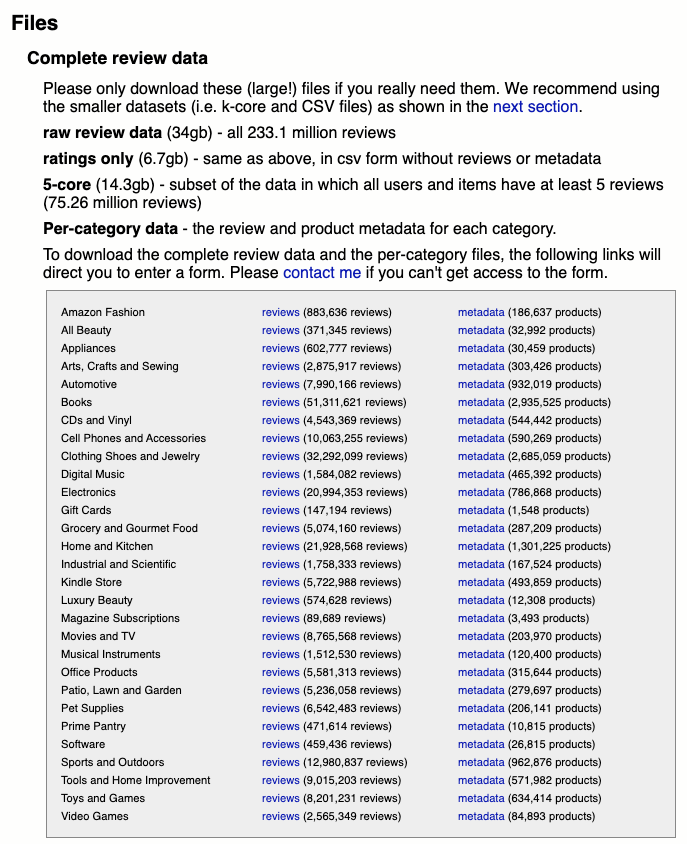

### 문제 30. 추천시스템에서 사용할 데이터 불러오기  
: user별 item의 '평균' rating을 담고있는 데이터 입니다.

In [ ]:
# 데이터 url.
review_data_with_labels_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/review_data.csv"

# 위의 url를 사용해서 각각의 DataFrame을 생성해보세요.
review_df = 

### 문제 31. 추천시스템에서 사용할 리뷰데이터 탐색하기

In [ ]:
# user, item의 수를 확인하세요.


In [ ]:
# item group의 수를 확인하세요.


In [ ]:
# item group별 item수를 확인하세요.


In [ ]:
# rating 분포를 확인하세요.
fig = px.histogram(, x=)
fig.update_layout(height=500, width=700)
fig.show()

### 문제 32. 리뷰데이터의 item_group 기준으로 평균 rating 구하기

In [ ]:
# item기준의 리뷰데이터를 item_group기준의 rating으로 변환해줍니다.
review_by_group_df = 

In [ ]:
# rating 분포를 확인하세요.
fig = px.histogram(, x=)
fig.update_layout(height=500, width=700)
fig.show()

### 문제 33. 추천시스템을 위한 surprise 모듈 import하기 
모듈 상세페이지 : https://surprise.readthedocs.io/en/stable/

In [ ]:
!pip install scikit-surprise

In [ ]:
# 필요한 모듈을 import 해주세요.
from surprise import Dataset, Reader
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV


### 문제 34. surprise 모듈에서 사용할 수 있도록 DataFrame 변형하기


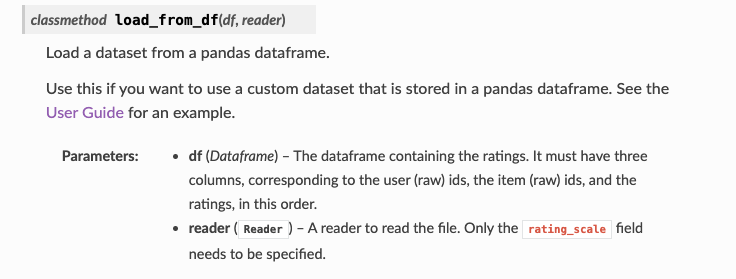

In [ ]:
# surprise 모듈에서 인식할수있는 데이터 형태로 변형해주세요. 
# [참고] Dataset.load_from_df() 를 사용합니다.
# The columns must correspond to user id, item id and ratings (in that order).



### 문제 35. surprise 모듈로 KNN 최적의 파라미터 찾기


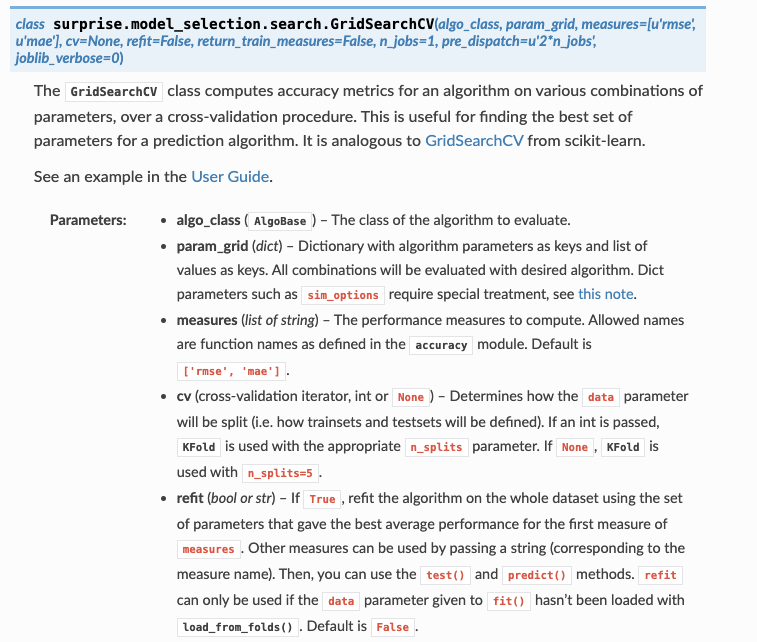

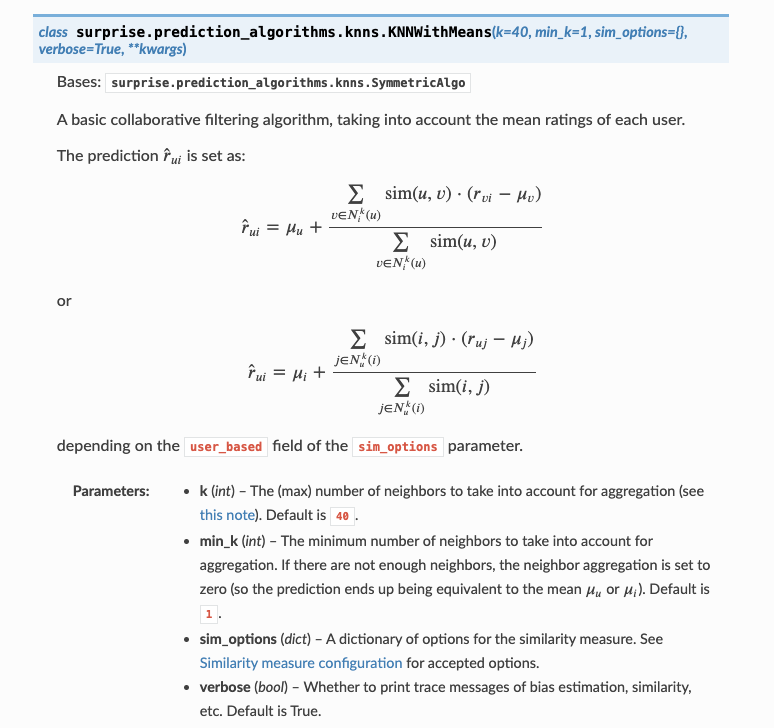

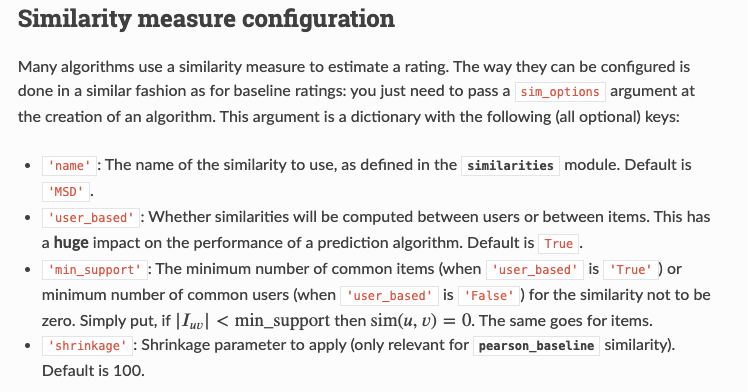

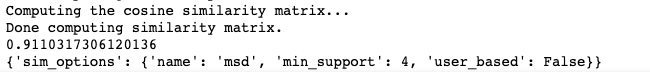

In [ ]:
# Grid Search로 비교할 파라미터를 설정하고 최적의 파라미터를 찾아보세요.
# sim_options = {
#     "name": ["cosine", "msd"],
#     "min_support": [3, 4, 5],
#     "user_based": [False, True],
# }




In [ ]:
# Grid Search의 결과를 DataFrame으로 확인해보세요.


### 문제 36. 최적의 파라미터로 추천시스템 훈련시키기


In [ ]:
# [문제 35]에서 찾은 최적의 파라미터 조합을 사용해서 모델을 불러오세요.
sim_options = {}
knn_algo = 

In [ ]:
# [문제 35]에서 사용한 surprise용 데이터로 모델을 훈련시켜보세요.
# [참고] train/test 나누지 않고 build_full_trainset()를 사용해서 전체 데이터를 사용합니다.


### 문제 37. 훈련된 추천시스템 모델의 결과 확인하기 (prediction)


In [ ]:
# user id를 한개 선택해서 원래의 review데이터를 확인해보세요.


In [ ]:
# 위에서 선택한 user id로 원래 review와 예측한 review를 비교해보세요.


In [ ]:
# 위에서 선택한 user id로 존재하지 않는 item의 review를 예측해보세요.


### 문제 38. 훈련된 모델을 사용하여 user에게 item을 추천해주는 함수 만들기


In [ ]:
# 컬럼명을 변경해주세요. (item_group -> item)


In [ ]:
# 추천함수 생성하기
def recommender_func(algo, df, uid, item_cnt=30):

  return pre_rating_df, iid_list


In [ ]:
pre_rating_df, iid_list = recommender_func()

## Chapter03 마무리
- 판매자(공급)에 관련된 데이터를 이해합니다. (메타데이터, 거래데이터 등)
- 메타데이터와 거래데이터를 구별하지 않고 clustering에 활용 가능합니다.
- Clustering 과정에서 PCA를 통해 차원을 축소할 수 있습니다. (해석은 어려워질 수 있습니다.)
- 훈련된 clustering 결과는 다양한 방법으로 활용할 수 있습니다. (e.g., 추천시스템)